In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv


In [2]:
df=pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')
df.shape

(6362620, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [6]:
df.step.value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [9]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

<AxesSubplot:>

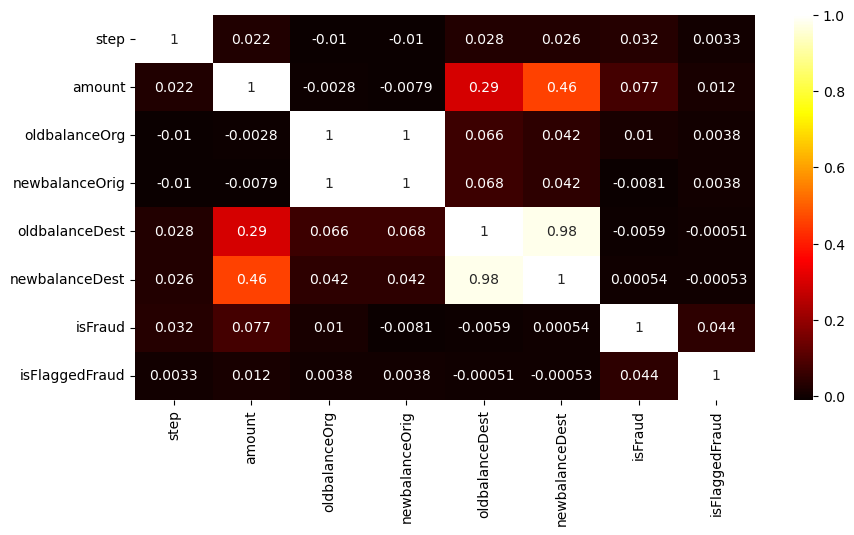

In [11]:

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='hot')

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

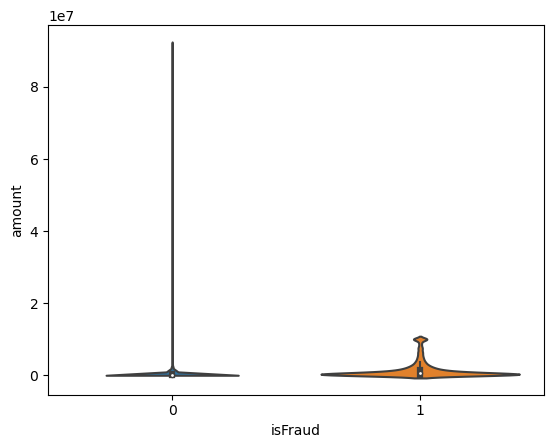

In [12]:
sns.violinplot(x = df['isFraud'],y = df['amount'])

<AxesSubplot:xlabel='isFraud', ylabel='oldbalanceOrg'>

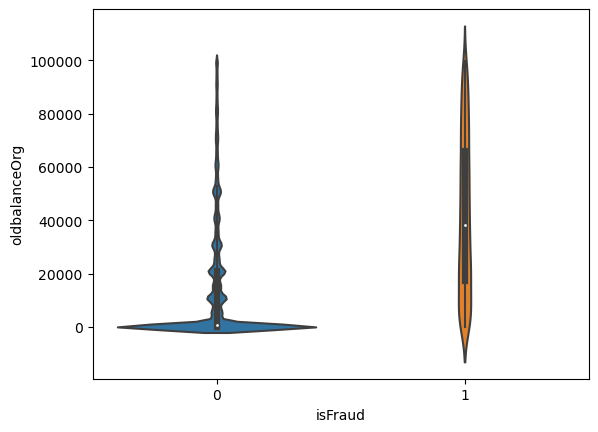

In [13]:
sns.violinplot(x = df['isFraud'],y = df[df['oldbalanceOrg']<100000].oldbalanceOrg)

<AxesSubplot:xlabel='isFraud', ylabel='step'>

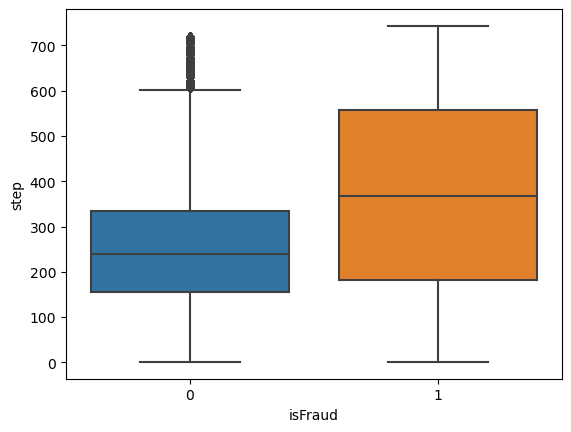

In [14]:
sns.boxplot(x=df.isFraud,y=df.step)

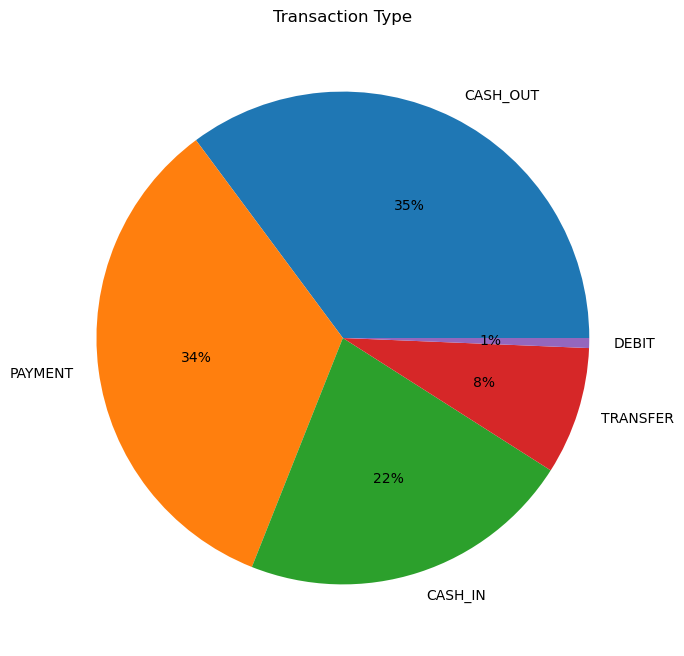

In [15]:
plt.figure(figsize=(10,8))
plt.pie(df.type.value_counts().values,labels=df.type.value_counts().index,  autopct='%.0f%%')
plt.title("Transaction Type")
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = {}
for i in df.select_dtypes('object').columns:
    encoder[i] = LabelEncoder()
    df[i] = encoder[i].fit_transform(df[i])

In [17]:
x = df.drop(columns=['isFraud'])
y = df['isFraud']

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)


In [19]:
x = df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'isFlaggedFraud']]
y= df['isFraud']


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

0.9988951092474484

In [22]:
import xgboost as xg
xgb_r8= xg.XGBClassifier(max_depth=7)
  
xgb_r8.fit(x_train,y_train)
xgb_r8.score(x_test,y_test)

0.9998011825317243

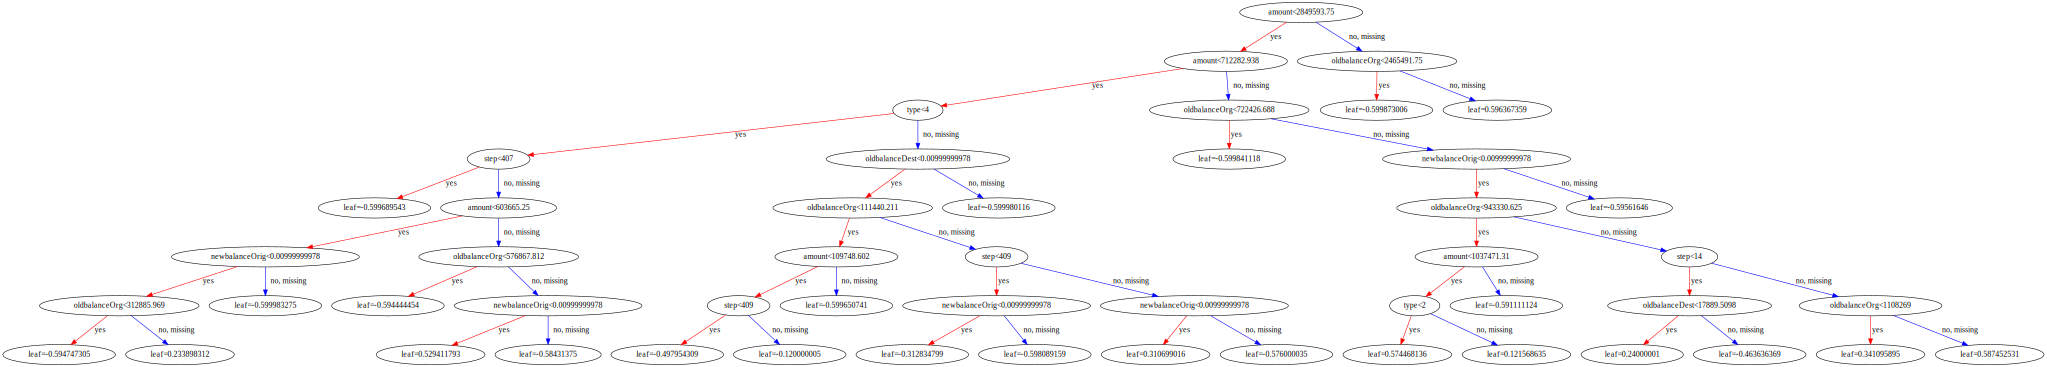

In [23]:
from xgboost import to_graphviz
to_graphviz(xgb_r8)

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9996440145726132

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9987127944148794

In [26]:
over_sample = SMOTE(random_state=0)
x,y = over_sample.fit_resample(x,y)

In [27]:
y.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)


In [29]:
x = df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'isFlaggedFraud']]
y= df['isFraud']


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [32]:
log_reg.score(x_test,y_test)

0.9988951092474484

In [33]:
from sklearn import metrics
from sklearn.metrics import average_precision_score,accuracy_score,f1_score,classification_report,precision_recall_curve,confusion_matrix

In [34]:
def return_model(model,xtest,ytest):
    y_pred=model.predict(xtest)
    print(classification_report(ytest,y_pred))
    c_m=confusion_matrix(ytest,y_pred)
    

In [35]:
def c_m(model,xtest,ytest):
    y_pred=model.predict(xtest)
    c_m=confusion_matrix(ytest,y_pred)
    return c_m

In [36]:
return_model(log_reg,x_test,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.62      0.36      0.46      1641

    accuracy                           1.00   1272524
   macro avg       0.81      0.68      0.73   1272524
weighted avg       1.00      1.00      1.00   1272524



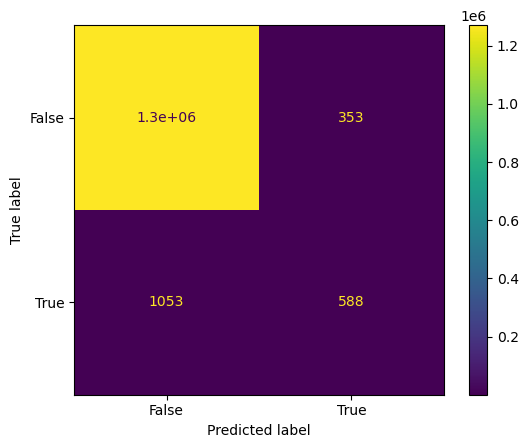

In [37]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_m(log_reg,x_test,y_test), display_labels = [False, True])
cm_display.plot()
plt.show()

In [38]:
evalset = [(x_train, y_train), (x_test,y_test)]

In [39]:
import xgboost as xg
xgb_r8= xg.XGBClassifier(max_depth=7)
  
xgb_r8.fit(x_train,y_train,eval_metric='logloss', eval_set=evalset)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-logloss:0.43813	validation_1-logloss:0.43813
[1]	validation_0-logloss:0.29730	validation_1-logloss:0.29729
[2]	validation_0-logloss:0.20861	validation_1-logloss:0.20861
[3]	validation_0-logloss:0.14925	validation_1-logloss:0.14925
[4]	validation_0-logloss:0.10817	validation_1-logloss:0.10818
[5]	validation_0-logloss:0.07912	validation_1-logloss:0.07913
[6]	validation_0-logloss:0.05830	validation_1-logloss:0.05831
[7]	validation_0-logloss:0.04322	validation_1-logloss:0.04323
[8]	validation_0-logloss:0.03223	validation_1-logloss:0.03224
[9]	validation_0-logloss:0.02420	validation_1-logloss:0.02421
[10]	validation_0-logloss:0.01828	validation_1-logloss:0.01831
[11]	validation_0-logloss:0.01392	validation_1-logloss:0.01396
[12]	validation_0-logloss:0.01070	validation_1-logloss:0.01074
[13]	validation_0-logloss:0.00829	validation_1-logloss:0.00832
[14]	validation_0-logloss:0.00650	validation_1-logloss:0.00655
[15]	validation_0-logloss:0.00513	validation_1-logloss:0.00517
[1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [40]:
xgb_r8.score(x_test,y_test)

0.9998011825317243

In [41]:
xgb_r8.score(x_train,y_train)

0.9999051098446866

In [42]:
return_model(xgb_r8,x_test,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.96      0.88      0.92      1641

    accuracy                           1.00   1272524
   macro avg       0.98      0.94      0.96   1272524
weighted avg       1.00      1.00      1.00   1272524



In [43]:
import plotly.graph_objects as go

months=['precision','recall','f1-score']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y=[1.00 ,1.00,1.00],
    name='non fraudulent',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y=[0.96 ,0.88 ,0.92],
    name='fraudulent',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=months,
    y=[ 0.98 ,0.94 ,0.96],
    name='Secondary Product',
    marker_color='LightSkyBlue'
))
fig.add_trace(go.Bar(
    x=months,
    y=[ 1.00,1.00,1.00],
    name='weighted avg',
    marker_color='DarkSlateGrey'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

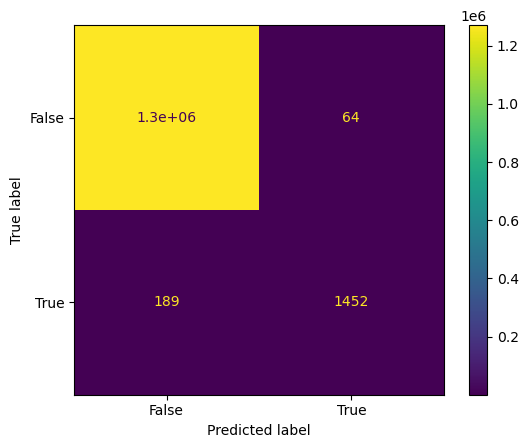

In [44]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_m(xgb_r8,x_test,y_test), display_labels = [False, True])
cm_display.plot()
plt.show()

In [45]:
results = xgb_r8.evals_result()

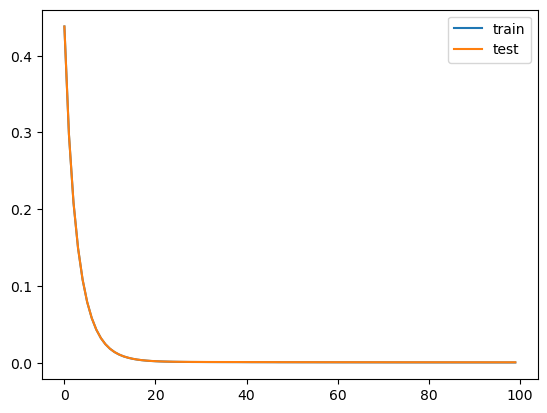

In [46]:
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
plt.legend()
plt.show()

In [47]:
import shap

In [48]:
xtest=x_test.iloc[:62000,:]
xtest.shape

(62000, 8)

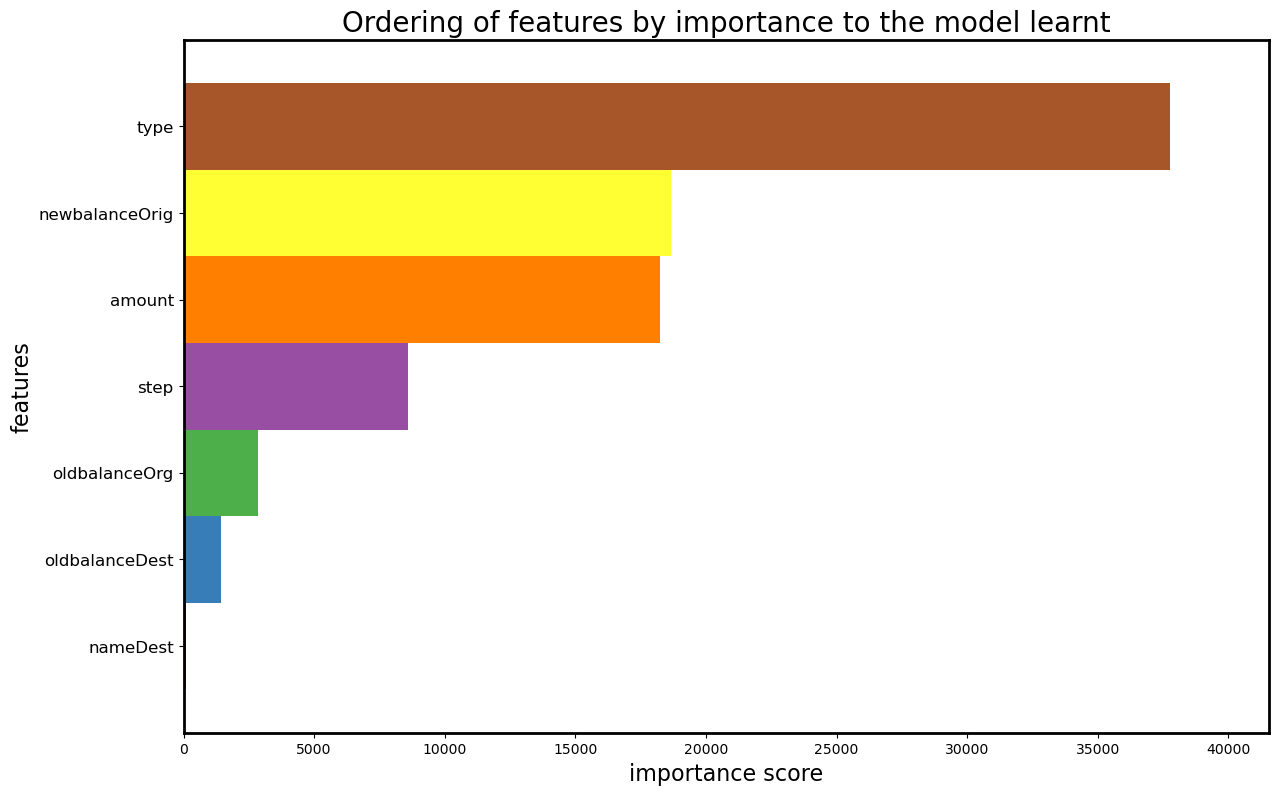

In [49]:
from xgboost import plot_importance
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(xgb_r8, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

In [50]:
explainer = shap.Explainer(xgb_r8.predict, xtest)
shap_values = explainer(xtest)

Exact explainer: 62001it [30:14, 34.07it/s]


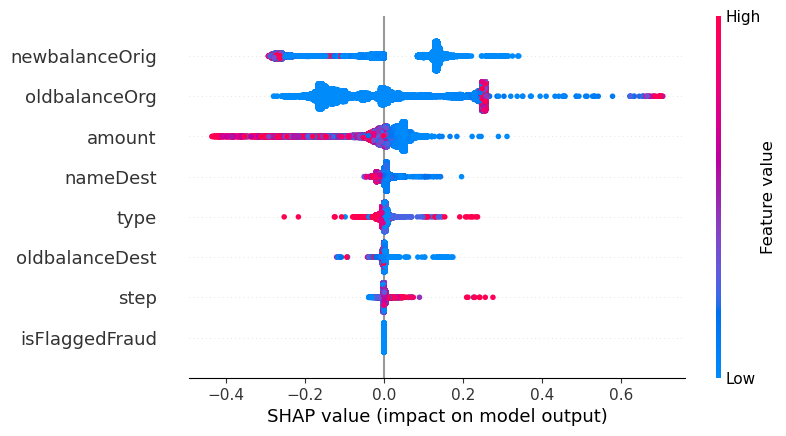

In [51]:
shap.plots.beeswarm(shap_values)

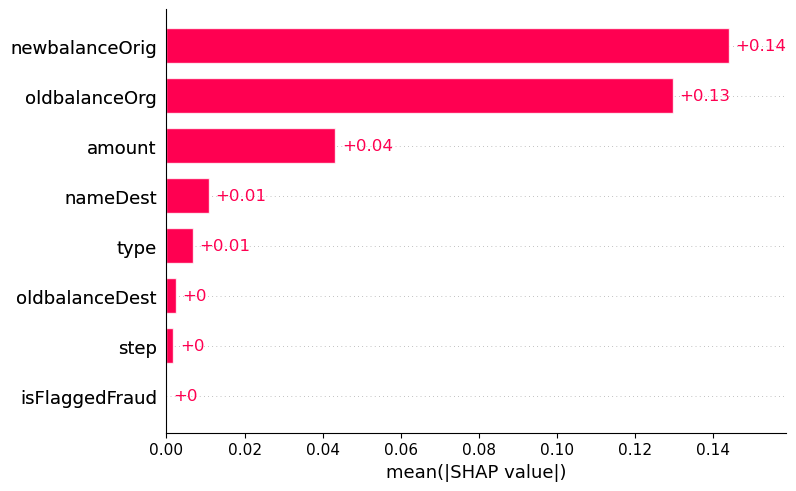

In [52]:
shap.plots.bar(shap_values)

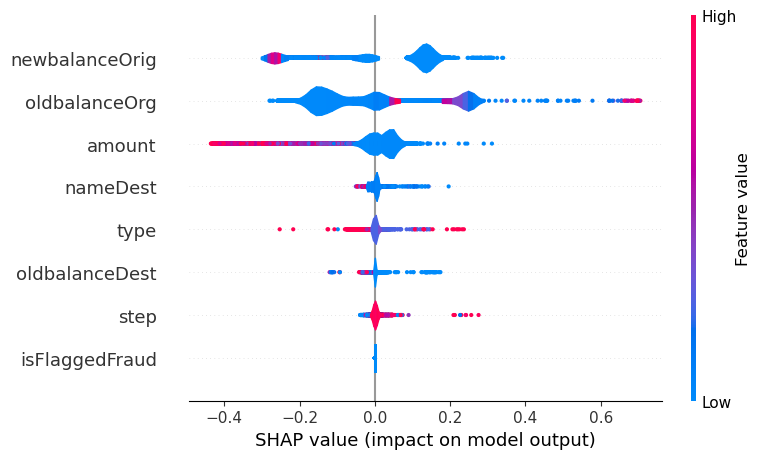

In [53]:
shap.summary_plot(shap_values, plot_type='violin')

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9996440145726132

In [55]:
return_model(clf,x_test,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.87      0.85      0.86      1641

    accuracy                           1.00   1272524
   macro avg       0.93      0.93      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



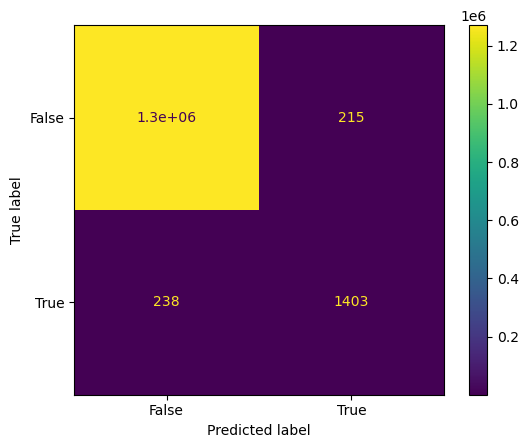

In [56]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_m(clf,x_test,y_test), display_labels = [False, True])
cm_display.plot()
plt.show()